<a href="https://colab.research.google.com/github/Harsh-Chaudhary-IITK/ML_ANN-project/blob/main/ML_Project_Harsh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
!pip install np_utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61 kB 484 kB/s 
  Created wheel for np-utils: filename=np_utils-0.6.0-py3-none-any.whl size=56459 sha256=b942efe5c26e501b5ca2dd1a2562a8fe3336bf5d56ae84d2b56caf53fbe81116
  Stored in directory: /root/.cache/pip/wheels/d2/83/71/a781667865955ae7dc18e5a4038401deb56d96eb85d3a5f1c0
Successfully built np-utils


In [ ]:
import numpy as np
import pandas as pd
from plotly.offline import iplot
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML project/final_data2.csv")
# df.fillna("",inplace=True)

In [ ]:
df.columns


Index(['Benefits', 'Contraindication', 'Yoga Asan'], dtype='object')

In [ ]:
df=df.dropna()

In [ ]:
df.reset_index()

,index,Benefits,Contraindication,Yoga Asan
0,0,Corrects bad posture by straightening the spin...,If you have Parkinson’s disease,TADASANA
1,1,Relieves gastritis indigestion acidity and fla...,If you are prone to dizzy spells vertigo,UTTHITA TRIKONASANA
2,2,Improves breathing capacity by expanding the c...,Do not practise if you have a cardiac conditio...,VIRABHADRASANA 2
3,3,"Enhances lung capacity , Tones the muscles of ...",If you have high blood pressure avoid this asa...,UTTHITA PARSVAKONASANA
4,4,"Cools the brain and soothes the nerves, Reliev...",If you have high blood pressure,PARSVOTTANASANA
...,...,...,...,...
507,583,"Strengthens core, arms, shoulders, elbows and ...","Hips,Knees,Shoulders,Back",Kukkutasana
508,584,"Strengthens core, arms, and shoulders. Improve...","Hips,Knees,Shoulders,Back Injury",Karandavasana
509,585,Strengthens the core and arms.,"Shoulders,Hips,Wrists",Lolasana
510,586,Stretches the entire front body and opens the ...,"Arms,Hips,Knees Injury",Dvi Pada Viparita Dandasana


In [ ]:
x1='Benefits'
x2='Yoga Asan'

In [ ]:
data = df[[x1,x2]]
data = data.dropna()
data=data.reset_index()
# df.fillna("",inplace=True)
data

,index,Benefits,Yoga Asan
0,0,Corrects bad posture by straightening the spin...,TADASANA
1,1,Relieves gastritis indigestion acidity and fla...,UTTHITA TRIKONASANA
2,2,Improves breathing capacity by expanding the c...,VIRABHADRASANA 2
3,3,"Enhances lung capacity , Tones the muscles of ...",UTTHITA PARSVAKONASANA
4,4,"Cools the brain and soothes the nerves, Reliev...",PARSVOTTANASANA
...,...,...,...
507,583,"Strengthens core, arms, shoulders, elbows and ...",Kukkutasana
508,584,"Strengthens core, arms, and shoulders. Improve...",Karandavasana
509,585,Strengthens the core and arms.,Lolasana
510,586,Stretches the entire front body and opens the ...,Dvi Pada Viparita Dandasana


In [ ]:
data.shape    

(512, 3)

In [ ]:
data.dtypes

index         int64
Benefits     object
Yoga Asan    object
dtype: object

In [ ]:
  data[x2].value_counts()

Karnapidasana              4
BHARADVAJASANA             4
Bhekasana                  3
Padmasana                  3
Jathara Parivartanasana    3
                          ..
Murcha Pranayama           1
Sitali                     1
Simhasana\n                1
Virasana                   1
Supta Konasana             1
Name: Yoga Asan, Length: 429, dtype: int64

In [ ]:
data.head()

,index,Benefits,Yoga Asan
0,0,Corrects bad posture by straightening the spin...,TADASANA
1,1,Relieves gastritis indigestion acidity and fla...,UTTHITA TRIKONASANA
2,2,Improves breathing capacity by expanding the c...,VIRABHADRASANA 2
3,3,"Enhances lung capacity , Tones the muscles of ...",UTTHITA PARSVAKONASANA
4,4,"Cools the brain and soothes the nerves, Reliev...",PARSVOTTANASANA


In [ ]:
def example_complain(index):
    example = data[data.index == index][[x1,x2]].values[0]
    if len(example) > 0:
        print(example[0])
        print()
        print('Category:', example[1])

In [ ]:
example_complain(0)

Corrects bad posture by straightening the spine, Improves the alignment of your body, Counters the degenerative effects of ageing 
on the spine legs and feet, Tones the buttock muscles

Category: TADASANA


In [ ]:
data = data.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^a-z ]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
data[x1] = data[x1].apply(clean_text)

In [ ]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^a-z ]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
data[x2] = data[x2].apply(clean_text)


In [ ]:
for i in range(len(data[x2])):
  if data[x2][i]==None:
    continue
  for j in range(len(data[x2])):
    if i!=j and data[x2][j]!=None:
      if data[x2][i]==data[x2][j]:
        data[x1][i]=data[x1][i]+' '+data[x1][j]
        data[x1][j]=None;
        data[x2][j]=None;
        

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data=data.dropna()
data = data.reset_index(drop=True)

In [ ]:
data

,index,Benefits,Yoga Asan
0,0,corrects bad posture straightening spine impro...,tadasana
1,1,relieves gastritis indigestion acidity flatule...,utthita trikonasana
2,2,improves breathing capacity epanding chest hel...,virabhadrasana
3,3,enhances lung capacity tones muscles heart rel...,utthita parsvakonasana
4,4,cools brain soothes nerves relieves arthritis ...,parsvottanasana
...,...,...,...
332,579,stretches hip fleors hamstrings quadriceps imp...,uttana pristhasana
333,580,opens lengthens hip fleors quadriceps thoracic...,crooked monkey pose
334,582,improves focus balance stretches shoulders arm...,shayanasana
335,586,stretches entire front body opens chest tones ...,dvi pada viparita dandasana


In [ ]:
example_complain(1)

relieves gastritis indigestion acidity flatulence improves fleibility spine alleviates backache corrects alignment shoulders helps treat neck sprains massages tones pelvic area strengthens ankles reduces discomfort menstruation etended triangle good lengthening spine strengthening thighs torso pose also stretches hips groin hamstrings calves shoulders chest spine

Category: utthita trikonasana


In [ ]:
data

,index,Benefits,Yoga Asan
0,0,corrects bad posture straightening spine impro...,tadasana
1,1,relieves gastritis indigestion acidity flatule...,utthita trikonasana
2,2,improves breathing capacity epanding chest hel...,virabhadrasana
3,3,enhances lung capacity tones muscles heart rel...,utthita parsvakonasana
4,4,cools brain soothes nerves relieves arthritis ...,parsvottanasana
...,...,...,...
332,579,stretches hip fleors hamstrings quadriceps imp...,uttana pristhasana
333,580,opens lengthens hip fleors quadriceps thoracic...,crooked monkey pose
334,582,improves focus balance stretches shoulders arm...,shayanasana
335,586,stretches entire front body opens chest tones ...,dvi pada viparita dandasana


In [ ]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 20000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 500
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^`{|}~', lower=True)
tokenizer.fit_on_texts(data[x1].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))


Found 2645 unique tokens.


In [ ]:
X = tokenizer.texts_to_sequences(data[x1].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (337, 500)


In [ ]:
Y = pd.get_dummies(data[x2]).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (337, 337)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(303, 500) (303, 337)
(34, 500) (34, 337)


In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
# model.add(Dense(337, activation='relu'))

model.add(LSTM(100))
model.add(Dense(337, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 100)          2000000   
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 500, 100)         0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense_1 (Dense)             (None, 337)               34037     
                                                                 
Total params: 2,114,437
Trainable params: 2,114,437
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
epochs = 100
batch_size = 64

history = model.fit(X, Y, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=100)])

Epoch 1/100
5/5 [==============================] - 3s 655ms/step - loss: 5.5548 - accuracy: 0.0132 - val_loss: 6.2282 - val_accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 3s 645ms/step - loss: 5.4685 - accuracy: 0.0132 - val_loss: 6.2667 - val_accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 3s 654ms/step - loss: 5.3785 - accuracy: 0.0132 - val_loss: 6.3943 - val_accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 5s 1s/step - loss: 5.3044 - accuracy: 0.0165 - val_loss: 6.4721 - val_accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 3s 649ms/step - loss: 5.2129 - accuracy: 0.0165 - val_loss: 6.7173 - val_accuracy: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 3s 653ms/step - loss: 5.1252 - accuracy: 0.0198 - val_loss: 6.7007 - val_accuracy: 0.0000e+00
Epoch 7/100
5/5 [==============================] - 3s 644ms/step - loss: 5.0380 - accuracy: 0.0330 - val_loss: 6.7579 - val_accuracy:

In [ ]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

2/2 [==============================] - 0s 36ms/step - loss: 1.6571 - accuracy: 0.8529
Test set
  Loss: 1.657
  Accuracy: 0.853


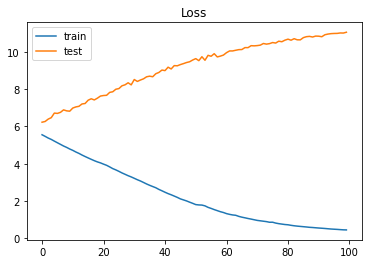

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

In [ ]:
labels1=list(data[x2])
labels2=list(data[x1])
#labels1

In [ ]:
new_complaint = ['blood circulation']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels =labels1
labels3=labels2
for i in range(5):
  print(labels[np.argsort(np.max(pred, axis=0))[-(i+1)]])
  # print(labels3[np.argsort(np.max(pred, axis=0))[-(i+1)]])
# pred

kraunchasana
parivritta sukhasana
prana mudra
setu asana
utthita marichyasana
